Nombre de los participantes Proyecto
Juan José Naranjo Velásquez CC : 1039474689
Kenneth David Leonel Triana CC: 1192817456

Librerias 

In [116]:
# Carga de librerias
from IPython.display import display
import subprocess as sp
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import random
import time
from datetime import datetime
import datetime
from scipy import stats
import statsmodels.api as sm
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

Configuraciones básicas para el desarrollo

In [2]:

# Configurar parametros de pandas y matplotlib
pd.set_option('display.precision', 4)
%config IPCompleter.greedy=True
%matplotlib inline

params = {}
plt.rcParams.update(params)
params = {
           'legend.fontsize': 20,
           'legend.handlelength': 2,
           'axes.titlesize':'20',
           'xtick.labelsize':'20',
           'ytick.labelsize':'20'
         }

matplotlib.rcParams.update(params)

Unificar en archivos los datos de las diferentes estaciones

Cambiar el codigo por el nombre de la estación

In [3]:
def categoriaCodigoSerial(codigo):
    """
    Función para definir la categoría de calidad del aire
    args:   codigo = código serial de calidad del aire
    In[0]: código serial
    Out[0]: categoría de calidad del aire
    """
    if codigo == 28:
        return 'Estacion Itagui'
    elif codigo == 69:
        return 'Estacion Caldas'
    elif codigo == 86 or codigo == 68:
        return 'Estacion Aranjuez'
    elif codigo == 83 or codigo == 198 or codigo == 9:
        return 'Estacion Belen'

In [4]:

def unificar_archivos_excel(carpeta_principal, archivo_salida):
    # Lista para almacenar todos los dataframes
    dfs = []
    
    # Recorre todos los archivos en la carpeta principal y subcarpetas
    for root, dirs, files in os.walk(carpeta_principal):
        for file in files:
            if file.endswith('.csv') or file.endswith('.xlsx'):  # Verifica si es un archivo Excel
                archivo_actual = os.path.join(root, file)
                print (f"El nombre de archivo es : {archivo_actual}") #El nombre de archivo es : data/raw/calidad\estacion_data_calidadaire_83_20230701_20240930.csv 
                
                #Se guarda el numero de la estación que pertenece el archivo
                estacion = file.split('_')[3]
                print(f"Estación  numero: {estacion}")  # Estación : 83 
                try:
                    # Lee el archivo Excel y agrega su contenido a la lista
                    df = pd.read_csv(archivo_actual)
                    df['codigo'] = estacion  # Agrega una columna con el número de la estación
                    dfs.append(df)
                except Exception as e:
                    print(f"No se pudo leer el archivo {archivo_actual}: {e}")

    # Si hay archivos leídos, unificarlos en un solo DataFrame
    if dfs:
        df_unificado = pd.concat(dfs, ignore_index=True)
        
        # Guardar el DataFrame unificado en un archivo Excel
        df_unificado.to_csv(archivo_salida, index=False)
        print(f"Archivos unificados en {archivo_salida}")
    else:
        print("No se encontraron archivos Excel.")

# Usar el script
carpeta_calidad = 'data/raw/calidad'  # Ruta a la carpeta principal
archivo_calidad = 'data/stage/unificado_calidad.csv'  # Nombre del archivo Excel de salida
df_calidad = unificar_archivos_excel(carpeta_calidad, archivo_calidad)

carpeta_humedad = 'data/raw/humedad'  # Ruta a la carpeta principal
archivo_humedad = 'data/stage/unificado_humedad.csv'  # Nombre del archivo Excel de salida
df_humedad = unificar_archivos_excel(carpeta_humedad, archivo_humedad)

carpeta_precipitacion = 'data/raw/precipitacion'  # Ruta a la carpeta principal
archivo_precipitacion = 'data/stage/unificado_precipitacion.csv'  # Nombre del archivo Excel de salida
df_precipitacion = unificar_archivos_excel(carpeta_precipitacion, archivo_precipitacion)

carpeta_presion = 'data/raw/presion'  # Ruta a la carpeta principal
archivo_presion = 'data/stage/unificado_presion.csv'  # Nombre del archivo Excel de salida
df_presion = unificar_archivos_excel(carpeta_presion, archivo_presion)

carpeta_temperatura = 'data/raw/temperatura'  # Ruta a la carpeta principal
archivo_temperatura = 'data/stage/unificado_temperatura.csv'  # Nombre del archivo Excel de salida
df_temperatura = unificar_archivos_excel(carpeta_temperatura, archivo_temperatura)

carpeta_vientos = 'data/raw/vientos'  # Ruta a la carpeta principal
archivo_vientos = 'data/stage/unificado_vientos.csv'  # Nombre del archivo Excel de salida
df_vientos = unificar_archivos_excel(carpeta_vientos, archivo_vientos)

El nombre de archivo es : data/raw/calidad\estacion_data_calidadaire_83_20230701_20240930.csv
Estación  numero: 83
El nombre de archivo es : data/raw/calidad\estacion_data_calidadaire_86_20230701_20240930.csv
Estación  numero: 86
Archivos unificados en data/stage/unificado_calidad.csv
El nombre de archivo es : data/raw/humedad\estacion_data_humedad_198__20230701_20240930.csv
Estación  numero: 198
El nombre de archivo es : data/raw/humedad\estacion_data_humedad_68__20230701_20240930.csv
Estación  numero: 68
Archivos unificados en data/stage/unificado_humedad.csv
El nombre de archivo es : data/raw/precipitacion\estacion_data_precipitacion_68__20230701_20240930.csv
Estación  numero: 68
El nombre de archivo es : data/raw/precipitacion\estacion_data_precipitacion_9__20230701_20240930.csv
Estación  numero: 9
Archivos unificados en data/stage/unificado_precipitacion.csv
El nombre de archivo es : data/raw/presion\estacion_data_presion_198__20230701_20240930.csv
Estación  numero: 198
El nombre 

Renombrar columna calidad en los diferentes archivos de calidad y metereológicos

In [5]:
# Ruta de la carpeta que contiene los archivos CSV
carpeta = "data/stage"

# Recorremos cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    # Verificamos que el archivo termine en .csv y empiece con "unificado_"
    if archivo.endswith(".csv") and archivo.startswith("unificado_"):
        ruta_completa = os.path.join(carpeta, archivo)
        # Leemos el CSV
        df = pd.read_csv(ruta_completa)
        # aplicamos la función de arriba
        df['estacion'] = df.apply(lambda row: categoriaCodigoSerial(row['codigo']), axis=1)
        # Extraemos el sufijo del nombre: lo que sigue a "unificado_" y antes de ".csv"
        sufijo = archivo[len("unificado_"):-len(".csv")]
        
        # Si existe la columna "Calidad", la renombramos
        if "Calidad" in df.columns:
            nuevo_nombre = f"calidad_{sufijo}"
            df.rename(columns={"Calidad": nuevo_nombre}, inplace=True)
            print(f"Archivo: {archivo} - Se renombró 'Calidad' a '{nuevo_nombre}'")
        else:
            print(f"Archivo: {archivo} - No se encontró la columna 'calidad'")
        
        # Guardamos el DataFrame modificado sobrescribiendo el archivo original
        df.to_csv(ruta_completa, index=False)   


Archivo: unificado_calidad.csv - No se encontró la columna 'calidad'
Archivo: unificado_humedad.csv - Se renombró 'Calidad' a 'calidad_humedad'
Archivo: unificado_precipitacion.csv - Se renombró 'Calidad' a 'calidad_precipitacion'
Archivo: unificado_presion.csv - Se renombró 'Calidad' a 'calidad_presion'
Archivo: unificado_temperatura.csv - Se renombró 'Calidad' a 'calidad_temperatura'
Archivo: unificado_vientos.csv - Se renombró 'Calidad' a 'calidad_vientos'


Unificar en un Archivo todos los datos metereológicos

In [6]:
import os
import pandas as pd

# Ruta de la carpeta que contiene los archivos CSV
carpeta = "data/stage"

# Lista de archivos a unir
archivos = [
    "unificado_humedad.csv",
    "unificado_precipitacion.csv",
    "unificado_presion.csv",
    "unificado_temperatura.csv",
    "unificado_vientos.csv"
]

# Inicializamos el dataframe final
df_merged = None

# Iteramos sobre cada archivo
for archivo in archivos:
    ruta_completa = os.path.join(carpeta, archivo)
    # Leemos el archivo CSV
    df_temp = pd.read_csv(ruta_completa)
    
    # Eliminar la columna 'codigo' si existe
    if 'codigo' in df_temp.columns:
        df_temp = df_temp.drop(columns=['codigo'])
    
    # Si es el primer archivo, lo asignamos directamente
    if df_merged is None:
        df_merged = df_temp
    else:
        # Realizamos el merge usando "fecha_hora" y "estacion" como claves
        df_merged = pd.merge(df_merged, df_temp, on=["fecha_hora", "estacion"], how="left")
    
    print(f"Archivo {archivo} unido correctamente.")

# Eliminar duplicados por "fecha_hora" y "estacion"
df_merged = df_merged.drop_duplicates(subset=["fecha_hora", "estacion"])

# Guardamos el dataset combinado en un nuevo archivo CSV
ruta_salida = os.path.join(carpeta, "dataset_completoMeteo.csv")
df_merged.to_csv(ruta_salida, index=False)
print("Dataset combinado guardado en:", ruta_salida)


Archivo unificado_humedad.csv unido correctamente.
Archivo unificado_precipitacion.csv unido correctamente.
Archivo unificado_presion.csv unido correctamente.
Archivo unificado_temperatura.csv unido correctamente.
Archivo unificado_vientos.csv unido correctamente.
Dataset combinado guardado en: data/stage\dataset_completoMeteo.csv


## Limpieza de datos Datos del SIATA

DataFrames de los datos 

In [7]:
calidadAire = pd.read_csv('data/stage/unificado_calidad.csv')
calidadAire.head()

,Fecha_Hora,codigoSerial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr,codigo,estacion
0,2023-07-01 00:00:00,83,5.9745,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
1,2023-07-01 01:00:00,83,16.6726,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
2,2023-07-01 02:00:00,83,23.8324,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
3,2023-07-01 03:00:00,83,14.2892,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
4,2023-07-01 04:00:00,83,20.2139,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen


In [8]:
meteo = pd.read_csv('data/stage/dataset_completoMeteo.csv')
meteo.head()

,fecha_hora,Humedad,calidad_humedad,estacion,P1,P2,calidad_precipitacion,Presion,calidad_presion,Temperatura,calidad_temperatura,Velocidad_Prom,Velocidad_Max,Direccion_Prom,Direccion_Max,calidad_vientos
0,2023-07-01 00:00:00,74.0,1,Estacion Belen,0.0,0.0,1.0,851.0,1,22.37,1.0,1.69,2.9,20.0,21.0,1.0
1,2023-07-01 00:01:00,74.0,1,Estacion Belen,0.0,0.0,1.0,851.0,1,22.31,1.0,1.92,3.2,24.0,17.0,1.0
2,2023-07-01 00:02:00,74.0,1,Estacion Belen,0.0,0.0,1.0,851.0,1,22.30,1.0,0.99,2.2,44.0,38.0,1.0
3,2023-07-01 00:03:00,74.0,1,Estacion Belen,0.0,0.0,1.0,851.0,1,22.40,1.0,0.46,0.8,45.0,33.0,1.0
4,2023-07-01 00:04:00,74.0,1,Estacion Belen,0.0,0.0,1.0,851.0,1,22.50,1.0,0.41,1.0,11.0,37.0,1.0


Dejar columnas en minusculas

In [9]:
# nombres de caracteristicas en minusculas calidad aire y metereológicas
calidadAire.columns = calidadAire.columns.str.lower()
meteo.columns = meteo.columns.str.lower()

# Se visualiza solo esta apra corroborar que se dejo en minusculas
calidadAire.head()

,fecha_hora,codigoserial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr,codigo,estacion
0,2023-07-01 00:00:00,83,5.9745,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
1,2023-07-01 01:00:00,83,16.6726,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
2,2023-07-01 02:00:00,83,23.8324,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
3,2023-07-01 03:00:00,83,14.2892,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
4,2023-07-01 04:00:00,83,20.2139,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen


Eliminación registros donde nuestra variable pm25 tenga valores -9999.0 que esto significa dato nulo
o que sean valores menores que 0

In [10]:
def eliminarRegistrosNulos(data,columna, valor):
    """
    Función para eliminar los valores nulos en una columna 
    estos son valores -999.0
    """
    # Nos quedamos con los valores que sean mayores a 0
    data = data[data[columna] > valor].reset_index(drop=True)
    return data

# Eliminar los valores nulos en la columna pm25
calidadAire = eliminarRegistrosNulos(calidadAire,'pm25', 0)
calidadAire.head()

,fecha_hora,codigoserial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr,codigo,estacion
0,2023-07-01 00:00:00,83,5.9745,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
1,2023-07-01 01:00:00,83,16.6726,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
2,2023-07-01 02:00:00,83,23.8324,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
3,2023-07-01 03:00:00,83,14.2892,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen
4,2023-07-01 04:00:00,83,20.2139,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,83,Estacion Belen


In [11]:
#Corroboramos que ya nuestra columna pm25 que es la que necesitabamos cerciorarnos que no tuviera datos nulos
calidadAire['pm25'].min()

np.float64(0.5)

Rectificar datos meteo

In [12]:
meteo.head()

,fecha_hora,humedad,calidad_humedad,estacion,p1,p2,calidad_precipitacion,presion,calidad_presion,temperatura,calidad_temperatura,velocidad_prom,velocidad_max,direccion_prom,direccion_max,calidad_vientos
0,2023-07-01 00:00:00,74.0,1,Estacion Belen,0.0,0.0,1.0,851.0,1,22.37,1.0,1.69,2.9,20.0,21.0,1.0
1,2023-07-01 00:01:00,74.0,1,Estacion Belen,0.0,0.0,1.0,851.0,1,22.31,1.0,1.92,3.2,24.0,17.0,1.0
2,2023-07-01 00:02:00,74.0,1,Estacion Belen,0.0,0.0,1.0,851.0,1,22.30,1.0,0.99,2.2,44.0,38.0,1.0
3,2023-07-01 00:03:00,74.0,1,Estacion Belen,0.0,0.0,1.0,851.0,1,22.40,1.0,0.46,0.8,45.0,33.0,1.0
4,2023-07-01 00:04:00,74.0,1,Estacion Belen,0.0,0.0,1.0,851.0,1,22.50,1.0,0.41,1.0,11.0,37.0,1.0


Función para convertir nuestro valores -999.0 o -9999.0 a nulos ya que estos no fueron tomados por los sensores del SIATA

In [13]:
#Función para pasar esos valores -999.0 o -9999.0 a NaN
def pasarDatosANulos(data,valor):
    """
    Función para pasar datos a valores nulos en un dataframe
    """
    # Reemplazamos los valores -999.0  u otro con NaN
    data = data.replace(valor, np.nan)
    return data

# Pasar los valores -999.0 y -9999.0 a NaN
meteo = pasarDatosANulos(meteo,-999.0)
print(f"Cantidad de registros en mi dataframe Metereológicos con los nulos : {len(meteo)}")

Cantidad de registros en mi dataframe Metereológicos con los nulos : 1188000


In [14]:
meteo = meteo.dropna()
print(f"Revisión de cantidad registros con la eliminación nulos:{len(meteo)}")

Revisión de cantidad registros con la eliminación nulos:749566


Corroboración valores maximos y minimos de los datos de calidad

In [15]:
# se mira los calores maximos de cada columna de los dataframes
print(f"Ver valores maximo por todas las variables de nuestro dataset :\n{calidadAire.max()}\n")


Ver valores maximo por todas las variables de nuestro dataset :
fecha_hora              2024-09-30 23:00:00
codigoserial                             86
pm25                               115732.0
calidad_pm25                           4.32
pm10                                -9999.0
calidad_pm10                            1.0
pm1                                 -9999.0
calidad_pm1                             1.0
no                                  -9999.0
calidad_no                              1.0
no2                                 -9999.0
calidad_no2                             1.0
nox                                 -9999.0
calidad_nox                             1.0
ozono                               -9999.0
calidad_ozono                           1.0
co                                  -9999.0
calidad_co                              1.0
so2                                 -9999.0
calidad_so2                             1.0
pst                                 -9999.0
calidad_pst 

In [16]:
print(f"Ver valores minimos por todas las variables de nuestro dataset :\n{calidadAire.min()}")

Ver valores minimos por todas las variables de nuestro dataset :
fecha_hora              2023-07-01 00:00:00
codigoserial                             83
pm25                                    0.5
calidad_pm25                            1.0
pm10                                -9999.0
calidad_pm10                            1.0
pm1                                 -9999.0
calidad_pm1                             1.0
no                                  -9999.0
calidad_no                              1.0
no2                                 -9999.0
calidad_no2                             1.0
nox                                 -9999.0
calidad_nox                             1.0
ozono                               -9999.0
calidad_ozono                           1.0
co                                  -9999.0
calidad_co                              1.0
so2                                 -9999.0
calidad_so2                             1.0
pst                                 -9999.0
calidad_pst

Filtrar el dataframe calidad aire para tomar las columnas pertinentes ya que observamos que los datos del SIATA solo toma los valores de la particula pm25

In [17]:
def filtro_data(data):
    """"
    Función para tomar columnas de estudio en archivos de calidad del aire en las diferentes estaciones
    In[0]: dataset
    Out[0]: dataset filtrado hasta columna de estudio
    """
    # Filtrar los datos hasta el indice que se encuentra la partícula pm25
    datosFiltrados = data.iloc[:,:4]
    return datosFiltrados

# Filtrar los datos
calidadAireFiltrada = filtro_data(calidadAire)
calidadAireFiltrada.head()

,fecha_hora,codigoserial,pm25,calidad_pm25
0,2023-07-01 00:00:00,83,5.9745,1.0
1,2023-07-01 01:00:00,83,16.6726,1.0
2,2023-07-01 02:00:00,83,23.8324,1.0
3,2023-07-01 03:00:00,83,14.2892,1.0
4,2023-07-01 04:00:00,83,20.2139,1.0


### Revision por columna calidad de los datos

In [18]:
def calidadDatos (data, revision) : 
    if revision == 1 :
        #Se rectifica que calidad temeperatura sea mayor a 1 
        data = data[data['calidad_temperatura']<= 2 ]
        data = data[data['calidad_humedad']<= 2]
        data = data[data['calidad_presion']<= 2]
        data = data[data['calidad_vientos']<= 2 ]
        data = data[data['calidad_precipitacion']<= 2]
        print("Calidad metereologicas rectificada correctamente")
        return data
    elif revision == 2 :
          data = data[data['calidad_pm25']<= 2.5]
          print("Calidad particula pm25 rectificada correctamente")
          return data



In [19]:
meteo['calidad_temperatura'].max()

np.float64(156272.0)

Usamos la función

In [20]:
meteo = calidadDatos(meteo,1)
meteo['calidad_temperatura'].max()

Calidad metereologicas rectificada correctamente


np.float64(1.0)

In [21]:
calidadAireFiltrada['calidad_pm25'].max()

np.float64(4.32)

In [22]:
calidadAireFiltrada = calidadDatos(calidadAireFiltrada,2)
calidadAireFiltrada['calidad_pm25'].max()


Calidad particula pm25 rectificada correctamente


np.float64(2.4)

Dado que los registros que se tienen por las características metereológicas se encuentran por minuto, debemos llevarlos a la estructura o base del dataset que almacena la calidad del aire bajo registros por dia, por ende, se realiza el promedio de los dataframes (Temperatura , precipitación, Vientos, Humedad, Presion) de las diferentes estaciones para homogeneizar la base final

#### Funcion para agregar columnas de las fechas

In [23]:

def agregarColumnas(data):
    """"
    Función para agregar columnas
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['anio'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.year
    dataTemporal['dia']= pd.to_datetime(dataTemporal['fecha_hora']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['fecha_hora']).dt.month
    #Si la granularidad fuera por horas
    # dataTemporal['hora'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.hour
    return dataTemporal

########### Función para sacar promedio ##################

def sacarPromedio(data,revision):
    """"
    Función para calcular el promedio de todas las columnas de un dataframe

    args:   data =  dataframe a utilizar
            nombrecolumna = característica a la cual se le realiza el promedio
            revision = indicador de revision (1,2,3) según las columnas de los dataframes
            1 si el dataframe es meteorologico
            2 si el dataframe contiene calidad del aire

    In[0]: dataset
    Out[0]: promedio de cada columna
    """
    #Llamamos a la funcion agregarColumnas
    dataNuevo = agregarColumnas(data)
    #return dataNuevo
    #se saca el promedio de temperatura de la columna Temperatura
    if (revision ==1):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia','estacion']).agg({
            'temperatura':'median',
            'humedad':'median',
            'presion':'median',
            'p1':'median',
            'calidad_humedad': lambda x: stats.mode(x)[0],
            'calidad_temperatura': lambda x: stats.mode(x)[0],
            'calidad_presion': lambda x: stats.mode(x)[0],
            'calidad_precipitacion': lambda x: stats.mode(x)[0],
            'calidad_vientos': lambda x: stats.mode(x)[0],
            'velocidad_prom': 'median',
            'velocidad_max':'median',
            'direccion_prom':'median',
            'direccion_max':'median'
        }).reset_index()
        return registroPromedio
    elif(revision ==2):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'pm25':'median',
            'calidad_pm25': lambda x: stats.mode(x)[0],
            'codigoserial': lambda x: stats.mode(x)[0]
        }).reset_index()
        return registroPromedio   

In [24]:
#Sacar promedio 
meteoPromedio = sacarPromedio(meteo,1)
meteoPromedio.head()

,anio,mes,dia,estacion,temperatura,humedad,presion,p1,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2023,7,1,Estacion Belen,24.88,65.000,849.42,0.0,1,1.0,1,1.0,1.0,0.900,1.8,144.0,183.0
1,2023,7,2,Estacion Belen,22.40,77.000,850.50,0.0,1,1.0,1,1.0,1.0,0.670,1.3,173.0,194.0
2,2023,7,3,Estacion Belen,21.55,82.070,851.94,0.0,1,1.0,1,1.0,1.0,0.430,0.8,164.0,197.0
3,2023,7,4,Estacion Belen,22.87,78.750,852.50,0.0,1,1.0,1,1.0,1.0,0.580,1.2,167.0,192.0
4,2023,7,5,Estacion Belen,22.33,79.425,851.13,0.0,1,1.0,1,1.0,1.0,0.815,1.6,155.0,189.0


In [25]:
#se saca el promedio de calidad del aire
calidadAirePromedio = sacarPromedio(calidadAireFiltrada,2)
calidadAirePromedio.head()

,anio,mes,dia,pm25,calidad_pm25,codigoserial
0,2023,7,1,10.7598,1.0,83
1,2023,7,2,14.3700,1.0,83
2,2023,7,3,12.1993,1.0,86
3,2023,7,4,14.4943,1.0,83
4,2023,7,5,12.6017,1.0,83


### Creación de columnas pertinentes para el estudio

##### Crear función para tener el día de la semana en una columna en cada dataframe

In [26]:
def definirDia(anio, mes, dia):
    """
    Función para definir el día de la semana
    args:   anio = año del dato
            mes = mes del dato
            dia = día del dato
    In[0]: año, mes, dia
    Out[0]: día de la semana en español
    """
    dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
    # se crea un objeto de la fecha
    objetoFecha = datetime.date(int(anio), int(mes), int(dia))
    # obtener el índice del día de la semana %W -> Weekday (0 es Domingo, 6 es Sábado)
    indice_dia = int(objetoFecha.strftime("%w"))
    # obtener el nombre del día en español

    nombreDia = dias_semana[indice_dia]
        #Condicion para agrupar dias
    if  nombreDia == "Lunes" or nombreDia == "Martes" or nombreDia == "Miercoles":
        return "Inicio Semana"
    elif nombreDia == "Jueves" or nombreDia == "Viernes" :
        return "Media semana"
    elif nombreDia == "Sabado" or nombreDia == "Domingo":
        return "Fin de Semana"

In [27]:
#Se usa función
calidadAirePromedio['dia_semana'] = calidadAirePromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
meteoPromedio['dia_semana'] = meteoPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# se muestran los primeros 5 datos
calidadAirePromedio.head()


,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana
0,2023,7,1,10.7598,1.0,83,Fin de Semana
1,2023,7,2,14.3700,1.0,83,Fin de Semana
2,2023,7,3,12.1993,1.0,86,Inicio Semana
3,2023,7,4,14.4943,1.0,83,Inicio Semana
4,2023,7,5,12.6017,1.0,83,Inicio Semana


### Se agrega columna categorica dependiendo del codigo serial 

In [28]:

# # Aplicar la función a cada fila del DataFrame estaciones
calidadAirePromedio['estacion'] = calidadAirePromedio.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)
calidadAirePromedio.head()


,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion
0,2023,7,1,10.7598,1.0,83,Fin de Semana,Estacion Belen
1,2023,7,2,14.3700,1.0,83,Fin de Semana,Estacion Belen
2,2023,7,3,12.1993,1.0,86,Inicio Semana,Estacion Aranjuez
3,2023,7,4,14.4943,1.0,83,Inicio Semana,Estacion Belen
4,2023,7,5,12.6017,1.0,83,Inicio Semana,Estacion Belen


### Se crea una columna binaria sobre si ese dia fue festivo o no

In [29]:
# Obtener los festivos de Colombia con el indicador CO
festivosColombia = holidays.CO()

# Función para verificar si es festivo
def es_festivo(anio, mes, dia):
   
    fecha = datetime.date(int(anio), int(mes), int(dia))
    festivo = fecha in festivosColombia
    if festivo == True :
        return 1
    elif festivo == False :
        return 0

In [30]:
# # Aplicamos la función es_festivo
calidadAirePromedio['festivo'] = calidadAirePromedio.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
# resultado para ver que hubo festivo 
calidadAirePromedio.iloc[0:5]

,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion,festivo
0,2023,7,1,10.7598,1.0,83,Fin de Semana,Estacion Belen,0
1,2023,7,2,14.3700,1.0,83,Fin de Semana,Estacion Belen,0
2,2023,7,3,12.1993,1.0,86,Inicio Semana,Estacion Aranjuez,1
3,2023,7,4,14.4943,1.0,83,Inicio Semana,Estacion Belen,0
4,2023,7,5,12.6017,1.0,83,Inicio Semana,Estacion Belen,0


### Concatenar los dos datasets

In [31]:
def unirDatos(data1, data2):
    """"
    Función para unir dos dataframes
    In[0]: dataset1, dataset2
    Out[0]: dataset unido
    """
    return pd.merge(data1,data2,on=['anio','mes','dia','dia_semana','estacion'],how='inner')

In [32]:
#Unir los dataframes
dataSetcalidad = unirDatos(calidadAirePromedio,meteoPromedio)
#Se muestran los primeros 5 datos
dataSetcalidad.head()

,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion,festivo,temperatura,...,p1,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2023,7,1,10.7598,1.0,83,Fin de Semana,Estacion Belen,0,24.88,...,0.0,1,1.0,1,1.0,1.0,0.900,1.8,144.0,183.0
1,2023,7,2,14.3700,1.0,83,Fin de Semana,Estacion Belen,0,22.40,...,0.0,1,1.0,1,1.0,1.0,0.670,1.3,173.0,194.0
2,2023,7,4,14.4943,1.0,83,Inicio Semana,Estacion Belen,0,22.87,...,0.0,1,1.0,1,1.0,1.0,0.580,1.2,167.0,192.0
3,2023,7,5,12.6017,1.0,83,Inicio Semana,Estacion Belen,0,22.33,...,0.0,1,1.0,1,1.0,1.0,0.815,1.6,155.0,189.0
4,2023,7,6,16.8782,1.0,83,Media semana,Estacion Belen,0,21.10,...,0.0,1,1.0,1,1.0,1.0,0.540,1.1,183.0,200.0


Se establece a que comuna pertenece la estación 

In [33]:
def definirComunaEstacion(estacion):
    """
    Función para definir la columna de comuna a la que pertenece la estación
    """
    if(estacion == "Estacion Belen"):
        return "comuna 16"
    elif(estacion == "Estacion Poblado"):
        return "comuna 14"
    elif(estacion == "Estacion Aranjuez"):
        return "comuna 4"
# Se define la columna de comuna
dataSetcalidad['comuna'] = dataSetcalidad.apply(lambda row: definirComunaEstacion(row['estacion']), axis=1)
dataSetcalidad.head()
    

,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion,festivo,temperatura,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,2023,7,1,10.7598,1.0,83,Fin de Semana,Estacion Belen,0,24.88,...,1,1.0,1,1.0,1.0,0.900,1.8,144.0,183.0,comuna 16
1,2023,7,2,14.3700,1.0,83,Fin de Semana,Estacion Belen,0,22.40,...,1,1.0,1,1.0,1.0,0.670,1.3,173.0,194.0,comuna 16
2,2023,7,4,14.4943,1.0,83,Inicio Semana,Estacion Belen,0,22.87,...,1,1.0,1,1.0,1.0,0.580,1.2,167.0,192.0,comuna 16
3,2023,7,5,12.6017,1.0,83,Inicio Semana,Estacion Belen,0,22.33,...,1,1.0,1,1.0,1.0,0.815,1.6,155.0,189.0,comuna 16
4,2023,7,6,16.8782,1.0,83,Media semana,Estacion Belen,0,21.10,...,1,1.0,1,1.0,1.0,0.540,1.1,183.0,200.0,comuna 16


### Revision variables

In [34]:
def eliminarColumnas(data, nombresColumnas):
    """
    Función para eliminar columnas en un dataframe
    """
    # Eliminar columnas que no sean necesarias
    data = data.drop(columns=nombresColumnas)
    return data

In [35]:
dataSetcalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anio                   263 non-null    int32  
 1   mes                    263 non-null    int32  
 2   dia                    263 non-null    int32  
 3   pm25                   263 non-null    float64
 4   calidad_pm25           263 non-null    float64
 5   codigoserial           263 non-null    int64  
 6   dia_semana             263 non-null    object 
 7   estacion               263 non-null    object 
 8   festivo                263 non-null    int64  
 9   temperatura            263 non-null    float64
 10  humedad                263 non-null    float64
 11  presion                263 non-null    float64
 12  p1                     263 non-null    float64
 13  calidad_humedad        263 non-null    int64  
 14  calidad_temperatura    263 non-null    float64
 15  calida

Se detalla si hay nularidad de los datos

In [36]:
#Se mira nularidad en las variables 
dataSetcalidad.isnull().sum()

anio                     0
mes                      0
dia                      0
pm25                     0
calidad_pm25             0
codigoserial             0
dia_semana               0
estacion                 0
festivo                  0
temperatura              0
humedad                  0
presion                  0
p1                       0
calidad_humedad          0
calidad_temperatura      0
calidad_presion          0
calidad_precipitacion    0
calidad_vientos          0
velocidad_prom           0
velocidad_max            0
direccion_prom           0
direccion_max            0
comuna                   0
dtype: int64

### Listado de nuestras variables 

Variables Categoricas

In [37]:
#Lista de variables categóricas
columnasCategoricas = dataSetcalidad.select_dtypes(include = ["object", 'category']).columns.tolist()
columnasCategoricas
dataSetcalidad[columnasCategoricas].head(3)

,dia_semana,estacion,comuna
0,Fin de Semana,Estacion Belen,comuna 16
1,Fin de Semana,Estacion Belen,comuna 16
2,Inicio Semana,Estacion Belen,comuna 16


Variables Númericas

In [38]:
#Lista de variables numéricas
dataSetcalidad = eliminarColumnas(dataSetcalidad, "codigoserial")
columnasNumericas=dataSetcalidad.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
dataSetcalidad[columnasNumericas].head(3)

,anio,mes,dia,pm25,calidad_pm25,festivo,temperatura,humedad,presion,p1,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2023,7,1,10.7598,1.0,0,24.88,65.00,849.42,0.0,1,1.0,1,1.0,1.0,0.90,1.8,144.0,183.0
1,2023,7,2,14.3700,1.0,0,22.40,77.00,850.50,0.0,1,1.0,1,1.0,1.0,0.67,1.3,173.0,194.0
2,2023,7,4,14.4943,1.0,0,22.87,78.75,852.50,0.0,1,1.0,1,1.0,1.0,0.58,1.2,167.0,192.0


Visualización variable pm25 en las diferentes estaciones

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\USER\AppData\Local\Temp\ipykernel_9476\673716703.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$g/$m^3$")


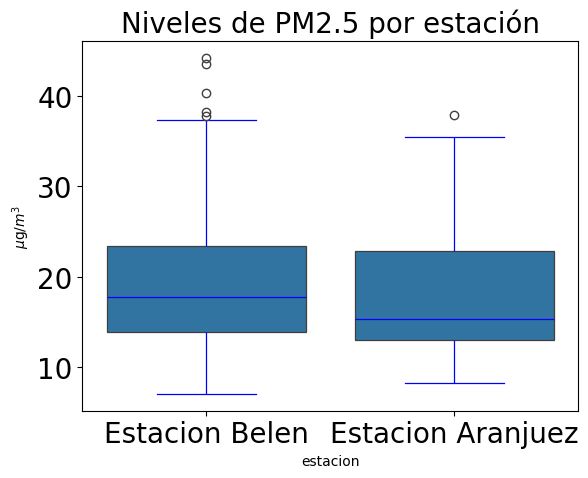

In [39]:
# Box Plot PM2.5 agrupado por estaciones
ax = sns.boxplot(x=dataSetcalidad['estacion'], y= dataSetcalidad['pm25'],  linewidth=0.9)
ax.set_title("Niveles de PM2.5 por estación")
plt.ylabel("$\mu$g/$m^3$")
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='blue')
plt.show()

Guardamos ya el dataSet de calidad Aire

In [40]:
dataSetcalidad.to_csv("data/stage/dataSetCalidadAire.csv", index=False)

## Limpieza datos RIPS 

In [55]:
## Se importa el csv
rips = pd.read_csv("data/raw/datosMedicos/RIPS_J000_J989_2020-2024P.csv")
rips.head()

,Encrypt,FechaConsulta,TipoCupsAtencion,sexo,edad,TipoUsuario,CodigoDiagnosticoPpal,NombreDX,Nombre298,NombreIPS,NombreEAPB,FechaSalidaUrgencias,FechaEgresoHospitalización
0,0x00002DED4396DEB1170CA180E1263A23C16C6DCF60CC...,2023-05-11,AMBULATORIA,F,34,1,J00X,RINOFARINGITIS AGUDA [RESFRIADO COMUN],Otras Infecciones Agudas de las Vías Respirato...,CIS COMFAMA CALASANZ,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.,NaN,NaN
1,0x00005427512BFF1AD5E02D07CB2EDAC0383EAFA2AEE2...,2024-05-23,AMBULATORIA,F,15,2,J329,SINUSITIS CRONICA,Sinusitis Crónica,FUNDACIÓN CLÍNICA NOEL,COOSALUD EPS S.A.,NaN,NaN
2,0x0000D652F2A46DC9AB562874465E7D2FF1E08F3843AD...,2020-02-21,AMBULATORIA,M,79,1,J029,FARINGITIS AGUDA,Faringitis Aguda y Amigdalitis Aguda,IPS SURA LOS MOLINOS MEDELLIN,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.,NaN,NaN
3,0x0000DA30FA3F9BA50AE5E82F085FD77EE5A0B596C235...,2021-09-20,AMBULATORIA,M,2,1,J00X,RINOFARINGITIS AGUDA [RESFRIADO COMUN],Otras Infecciones Agudas de las Vías Respirato...,CENTRO DE SALUD MORAVIA,ALIANZA MEDELLIN ANTIOQUIA EPS S.A.S. SAVIA SALUD,NaN,NaN
4,0x0001301D8B5F4EC23FFC2E5C1A129BA54469FC82F056...,2023-03-24,AMBULATORIA,F,87,1,J449,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Bronquitis enfisema y otras Enfermedades Pulm...,VIVA 1A IPS ESTADIO,NUEVA EMPRESA PROMOTORA DE SALUD S.A. SIGLA NU...,NaN,NaN


In [56]:
rips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436530 entries, 0 to 3436529
Data columns (total 13 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   Encrypt                     object
 1   FechaConsulta               object
 2   TipoCupsAtencion            object
 3   sexo                        object
 4   edad                        int64 
 5   TipoUsuario                 int64 
 6   CodigoDiagnosticoPpal       object
 7   NombreDX                    object
 8   Nombre298                   object
 9   NombreIPS                   object
 10  NombreEAPB                  object
 11  FechaSalidaUrgencias        object
 12  FechaEgresoHospitalización  object
dtypes: int64(2), object(11)
memory usage: 340.8+ MB


tamaño del archivo

In [57]:
len(rips)

3436530

Revisar la cantidad de IPS de nuestros datos médicos que tengan más de 1020 atenciones

In [58]:
columnaIPS = rips.groupby("NombreIPS").size()
columnaIPS2 =columnaIPS [columnaIPS >1020] 
columnaIPS2
#Guardamos el csv (Esto es solo la primera vez)
#columnaIPS2.to_csv("data/stage/nombresIPS.csv", index=True)

NombreIPS
AMANDA VIOLETA RODRIGUEZ DE PEREZ           3921
ANA MARIA DE LAS MERCEDES MEJIA GAVIRIA     7430
ANDRES FELIPE LONDOÑO BUSTAMANTE            2435
Aida Lida Castro Arias                      7628
Alina Restrepo Velez                        1386
                                           ...  
William Reinel Mejia Salazar                1566
especialistas en casa                      14162
helPharma Almacentro                       13013
jonathan rozenboim matiz                    1515
ÉDISON MORALES CÁRDENAS                     2748
Length: 214, dtype: int64

Se realizó en el archivo nombresIPS.csv agregar la columna comuna para saber la IPS en que comuna realiza el proceso médicos

Eliminar Registros que no cumplan que los centros médicos tengan más de 1020 atenciones por diagnósticos de enfermedades respiratorias

In [59]:
comunaIPS = pd.read_csv("data/raw/datosMedicos/nombresIPS.csv")
comunaIPS.head(8)

,NombreIPS,conteo_ips,comuna_ips
0,AMANDA VIOLETA RODRIGUEZ DE PEREZ,3921,comuna 14
1,ANA MARIA DE LAS MERCEDES MEJIA GAVIRIA,7430,comuna 14
2,ANDRES FELIPE LONDOÑO BUSTAMANTE,2435,comuna 10
3,Aida Lida Castro Arias,7628,comuna 14
4,Alina Restrepo Velez,1386,comuna 14
5,Arenas Ruiz Carolina,2553,comuna 14
6,BEATRIZ CECILIA VILLEGAS ORTEGA,2184,comuna 14
7,BIENESTAR IPS SEDE MEDELLIN,10717,comuna 4


Aplicar al dataset RIPS columna comuna

In [60]:
rips2 = pd.merge(rips, comunaIPS, on='NombreIPS', how='inner')
rips2.head(5)


,Encrypt,FechaConsulta,TipoCupsAtencion,sexo,edad,TipoUsuario,CodigoDiagnosticoPpal,NombreDX,Nombre298,NombreIPS,NombreEAPB,FechaSalidaUrgencias,FechaEgresoHospitalización,conteo_ips,comuna_ips
0,0x00002DED4396DEB1170CA180E1263A23C16C6DCF60CC...,2023-05-11,AMBULATORIA,F,34,1,J00X,RINOFARINGITIS AGUDA [RESFRIADO COMUN],Otras Infecciones Agudas de las Vías Respirato...,CIS COMFAMA CALASANZ,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.,NaN,NaN,36229,comuna 12
1,0x00005427512BFF1AD5E02D07CB2EDAC0383EAFA2AEE2...,2024-05-23,AMBULATORIA,F,15,2,J329,SINUSITIS CRONICA,Sinusitis Crónica,FUNDACIÓN CLÍNICA NOEL,COOSALUD EPS S.A.,NaN,NaN,15308,comuna 14
2,0x0000D652F2A46DC9AB562874465E7D2FF1E08F3843AD...,2020-02-21,AMBULATORIA,M,79,1,J029,FARINGITIS AGUDA,Faringitis Aguda y Amigdalitis Aguda,IPS SURA LOS MOLINOS MEDELLIN,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.,NaN,NaN,20673,comuna 16
3,0x0000DA30FA3F9BA50AE5E82F085FD77EE5A0B596C235...,2021-09-20,AMBULATORIA,M,2,1,J00X,RINOFARINGITIS AGUDA [RESFRIADO COMUN],Otras Infecciones Agudas de las Vías Respirato...,CENTRO DE SALUD MORAVIA,ALIANZA MEDELLIN ANTIOQUIA EPS S.A.S. SAVIA SALUD,NaN,NaN,2128,comuna 4
4,0x0001301D8B5F4EC23FFC2E5C1A129BA54469FC82F056...,2023-03-24,AMBULATORIA,F,87,1,J449,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Bronquitis enfisema y otras Enfermedades Pulm...,VIVA 1A IPS ESTADIO,NUEVA EMPRESA PROMOTORA DE SALUD S.A. SIGLA NU...,NaN,NaN,21307,comuna 11


### Eliminación de columnas 

Se eliminaron por motivos que detallamos que no son relevantes para el estudio

In [61]:
# Eliminar columna de no interés en el estudio del dataframe.
columnasAEliminar = ['Encrypt','TipoCupsAtencion','sexo','TipoUsuario','CodigoDiagnosticoPpal',
                     'NombreDX','Nombre298','NombreEAPB','FechaSalidaUrgencias','FechaEgresoHospitalización','conteo_ips']

#Eliminar columnas de datos médicos
rips2 = eliminarColumnas(rips2,columnasAEliminar)
rips2.head(5)

,FechaConsulta,edad,NombreIPS,comuna_ips
0,2023-05-11,34,CIS COMFAMA CALASANZ,comuna 12
1,2024-05-23,15,FUNDACIÓN CLÍNICA NOEL,comuna 14
2,2020-02-21,79,IPS SURA LOS MOLINOS MEDELLIN,comuna 16
3,2021-09-20,2,CENTRO DE SALUD MORAVIA,comuna 4
4,2023-03-24,87,VIVA 1A IPS ESTADIO,comuna 11


Revisa el tamaño

In [48]:
len(rips2)

3335545

### Creación columnas de interés

Columnas fechas

In [62]:
def agregarColumnasFechas(data):
    """"
    Función para agregar columnas
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['anio'] = pd.to_datetime(dataTemporal['FechaConsulta']).dt.year
    dataTemporal['dia']= pd.to_datetime(dataTemporal['FechaConsulta']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['FechaConsulta']).dt.month
    return dataTemporal

# Agregar columnas de fechas

rips2 = agregarColumnasFechas(rips2)
rips2.head(5)

,FechaConsulta,edad,NombreIPS,comuna_ips,anio,dia,mes
0,2023-05-11,34,CIS COMFAMA CALASANZ,comuna 12,2023,11,5
1,2024-05-23,15,FUNDACIÓN CLÍNICA NOEL,comuna 14,2024,23,5
2,2020-02-21,79,IPS SURA LOS MOLINOS MEDELLIN,comuna 16,2020,21,2
3,2021-09-20,2,CENTRO DE SALUD MORAVIA,comuna 4,2021,20,9
4,2023-03-24,87,VIVA 1A IPS ESTADIO,comuna 11,2023,24,3


Crear columna Sector

In [63]:
def definirSectorIPS(comuna):
    """
    Función para definir el sector de las IPS
    args:   comuna_ips = comuna donde se encuentra la IPS
    In[0]: comuna
    Out[0]: sector_ips
    """
    if comuna == 'comuna 7' or comuna == 'comuna 6' or comuna == 'comuna 5':
        return 'Noroccidental'
    elif comuna == 'comuna 12' or comuna == 'comuna 11' or comuna == 'comuna 13':
        return 'Centroccidental'
    elif comuna == 'comuna 16' or comuna == 'comuna 15':
        return 'Suroccidental'
    elif comuna == 'comuna 2' or comuna == 'comuna 1' or comuna == 'comuna 3' or comuna == 'comuna 4':
        return 'Nororiental'
    elif comuna == 'comuna 8' or comuna == 'comuna 9' or comuna == 'comuna 10':
        return 'Centroriental'
    elif comuna == 'comuna 14':
        return 'Suroriental'
    else :
        return 'Sin comuna'
    
# # Aplicamos la función crearFranjaHoraria
rips2['sector_ips'] = rips2.apply(lambda row: definirSectorIPS(row['comuna_ips']), axis=1)
rips2.head(5)

,FechaConsulta,edad,NombreIPS,comuna_ips,anio,dia,mes,sector_ips
0,2023-05-11,34,CIS COMFAMA CALASANZ,comuna 12,2023,11,5,Centroccidental
1,2024-05-23,15,FUNDACIÓN CLÍNICA NOEL,comuna 14,2024,23,5,Suroriental
2,2020-02-21,79,IPS SURA LOS MOLINOS MEDELLIN,comuna 16,2020,21,2,Suroccidental
3,2021-09-20,2,CENTRO DE SALUD MORAVIA,comuna 4,2021,20,9,Nororiental
4,2023-03-24,87,VIVA 1A IPS ESTADIO,comuna 11,2023,24,3,Centroccidental


In [64]:
rips2.drop('FechaConsulta',axis=1,inplace=True)
rips2.head(5)

,edad,NombreIPS,comuna_ips,anio,dia,mes,sector_ips
0,34,CIS COMFAMA CALASANZ,comuna 12,2023,11,5,Centroccidental
1,15,FUNDACIÓN CLÍNICA NOEL,comuna 14,2024,23,5,Suroriental
2,79,IPS SURA LOS MOLINOS MEDELLIN,comuna 16,2020,21,2,Suroccidental
3,2,CENTRO DE SALUD MORAVIA,comuna 4,2021,20,9,Nororiental
4,87,VIVA 1A IPS ESTADIO,comuna 11,2023,24,3,Centroccidental


Creación Columna Atención pacientes por IPS y fecha

In [67]:
# Contamos las filas por cada combinación de 'anio', 'mes' y 'dia' y 'NombreIPS'
rips2['atenciones_por_dia'] = rips2.groupby(['NombreIPS','anio', 'mes', 'dia'])['edad'].transform('count')
rips2.head(5)


,edad,NombreIPS,comuna_ips,anio,dia,mes,sector_ips,atenciones_por_dia
0,34,CIS COMFAMA CALASANZ,comuna 12,2023,11,5,Centroccidental,58
1,15,FUNDACIÓN CLÍNICA NOEL,comuna 14,2024,23,5,Suroriental,15
2,79,IPS SURA LOS MOLINOS MEDELLIN,comuna 16,2020,21,2,Suroccidental,97
3,2,CENTRO DE SALUD MORAVIA,comuna 4,2021,20,9,Nororiental,2
4,87,VIVA 1A IPS ESTADIO,comuna 11,2023,24,3,Centroccidental,39


Se guarda el archivo 

In [66]:
rips2.to_csv("data/stage/dataSetRIPS.csv",index=False)

### Concatenación de nuestro dos dataframes Limpios
ADEMÁS SE DEBE CONCATENAR POR LA COMUNA o el sector ES DECIR EN LOS DATOS METEREOLOGICOS TENEMOS QUE SABER O CREAR UNA COLUMNA DE ACUERDO A LA ESTACION PARA ESTA FORMA NO SE GENEREN REGISTROS SIN VALOR 

In [100]:
dataSetCompleto = rips2.merge(dataSetcalidad, right_on=['anio', 'mes', 'dia', 'comuna'], 
                         left_on=['anio', 'mes', 'dia', 'comuna_ips'], how='inner')

# Eliminar la columna 'comuna_ips' si ya no es necesaria
dataSetCompleto = dataSetCompleto.drop(columns=['comuna_ips'])
dataSetCompleto.head(5)

,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0,Corporación Hospital Infantil Concejo de Medellín,2024,18,8,Nororiental,21,14.2490,1.0,Fin de Semana,...,1,1.0,1,1.0,1.0,1.50,2.9,66.0,65.0,comuna 4
1,1,Corporación Hospital Infantil Concejo de Medellín,2024,13,2,Nororiental,129,23.2297,1.0,Inicio Semana,...,1,1.0,1,1.0,1.0,1.80,3.4,39.0,49.0,comuna 4
2,0,Corporación Hospital Infantil Concejo de Medellín,2024,5,4,Nororiental,76,16.1936,1.0,Media semana,...,1,1.0,1,1.0,1.0,1.00,1.9,157.5,165.5,comuna 4
3,18,VIRREY SOLIS IPS S.A. BELEN,2023,11,10,Suroccidental,33,19.3550,1.0,Inicio Semana,...,1,1.0,1,1.0,1.0,0.67,1.3,161.5,189.0,comuna 16
4,1,Corporación Hospital Infantil Concejo de Medellín,2024,8,2,Nororiental,106,9.3548,1.0,Media semana,...,1,1.0,1,1.0,1.0,2.50,4.6,33.0,49.0,comuna 4


### Limpieza de los datos 

- Se va a revisar que no se tengan datos limpios

In [101]:
#Revisar nulos

dataSetCompleto.isnull().sum()

edad                     0
NombreIPS                0
anio                     0
dia                      0
mes                      0
sector_ips               0
atenciones_por_dia       0
pm25                     0
calidad_pm25             0
dia_semana               0
estacion                 0
festivo                  0
temperatura              0
humedad                  0
presion                  0
p1                       0
calidad_humedad          0
calidad_temperatura      0
calidad_presion          0
calidad_precipitacion    0
calidad_vientos          0
velocidad_prom           0
velocidad_max            0
direccion_prom           0
direccion_max            0
comuna                   0
dtype: int64

In [102]:
len(dataSetCompleto)

27951

Guardamos datset

In [103]:
dataSetCompleto.to_csv("data/datset.csv", index=False)

In [88]:
dataSetCompleto.columns

Index(['anio', 'mes', 'dia', 'pm25', 'calidad_pm25', 'dia_semana', 'estacion',
       'festivo', 'temperatura', 'humedad', 'presion', 'p1', 'calidad_humedad',
       'calidad_temperatura', 'calidad_presion', 'calidad_precipitacion',
       'calidad_vientos', 'velocidad_prom', 'velocidad_max', 'direccion_prom',
       'direccion_max', 'comuna', 'edad', 'NombreIPS', 'sector_ips',
       'atenciones_por_dia'],
      dtype='object')

In [104]:

# Asumiendo que df es tu DataFrame
# Agrupar por todas las columnas para identificar duplicados
grupos = dataSetCompleto.groupby(dataSetCompleto.columns.tolist()).groups

# Filtrar grupos con registros duplicados (más de un índice)
duplicados = [indices.tolist() for indices in grupos.values() if len(indices) > 1]

# Mostrar los resultados
if len(duplicados) == 0:
    print("No hay registros duplicados.")
else:
    print("Registros duplicados (índices agrupados):")
    for grupo in duplicados:
        print(f"Índices: {grupo}")

Registros duplicados (índices agrupados):
Índices: [423, 8657]
Índices: [7714, 8372, 11318, 13564, 24312, 27005]
Índices: [70, 7944]
Índices: [25606, 27162]
Índices: [10743, 19439]
Índices: [14350, 17109]
Índices: [14351, 15424]
Índices: [630, 4210, 24868, 25062, 27006]
Índices: [13859, 14859, 24042]
Índices: [997, 3705, 6606, 8931, 12199, 13544, 19198, 24269, 24756, 27883]
Índices: [1105, 9333, 15585, 16638, 24352]
Índices: [16561, 17781]
Índices: [1437, 8440, 12448]
Índices: [5734, 10918, 16585]
Índices: [14496, 24747, 25522]
Índices: [3144, 9975]
Índices: [5118, 5476, 26651]
Índices: [19280, 23120]
Índices: [6327, 8084]
Índices: [4614, 6482, 8636]
Índices: [5791, 8782, 11835]
Índices: [12087, 12664, 19535]
Índices: [4269, 18967, 21323, 25101, 26865]
Índices: [4421, 6083, 14996, 20612, 27351]
Índices: [4603, 5950, 15952, 18135, 18531, 18710, 20687, 23984]
Índices: [2610, 6573, 16502]
Índices: [3803, 13586, 22878, 26087]
Índices: [2035, 2497, 3363, 9262, 15409, 16099, 18588, 20972, 21

In [112]:
dataSetCompleto.loc[[7714,8372,11318]]

,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
7714,0,CENTRO INTEGRAL DE SALUD ARANJUEZ,2024,3,1,Nororiental,78,14.3738,1.0,Inicio Semana,...,1,1.0,1,1.0,1.0,1.4,2.6,42.0,50.5,comuna 4
8372,0,CENTRO INTEGRAL DE SALUD ARANJUEZ,2024,3,1,Nororiental,78,14.3738,1.0,Inicio Semana,...,1,1.0,1,1.0,1.0,1.4,2.6,42.0,50.5,comuna 4
11318,0,CENTRO INTEGRAL DE SALUD ARANJUEZ,2024,3,1,Nororiental,78,14.3738,1.0,Inicio Semana,...,1,1.0,1,1.0,1.0,1.4,2.6,42.0,50.5,comuna 4


In [113]:
datosDuplicados = dataSetCompleto[dataSetCompleto.duplicated()]
datosDuplicados.head()

,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
61,0,Corporación Hospital Infantil Concejo de Medellín,2024,31,7,Nororiental,90,16.8455,1.0,Inicio Semana,...,1,1.0,1,1.0,1.0,1.70,3.2,73.0,75.0,comuna 4
138,0,Corporación Hospital Infantil Concejo de Medellín,2024,30,7,Nororiental,94,15.3474,1.0,Inicio Semana,...,1,1.0,1,1.0,1.0,1.30,2.6,95.0,90.5,comuna 4
148,6,Corporación Hospital Infantil Concejo de Medellín,2024,21,6,Nororiental,130,13.5976,1.0,Media semana,...,1,1.0,1,1.0,1.0,1.50,3.0,38.0,54.0,comuna 4
162,69,CLÍNICA LAS AMERICAS,2023,3,8,Suroccidental,14,14.5067,1.0,Media semana,...,1,1.0,1,1.0,1.0,1.18,2.2,54.0,56.0,comuna 16
215,68,SEDE PRINCIPAL HOSPITAL ALMA MÁTER DE ANTIOQUIA,2024,19,7,Nororiental,74,12.8196,1.0,Media semana,...,1,1.0,1,1.0,1.0,1.80,3.5,44.5,56.0,comuna 4


In [114]:
len(datosDuplicados) 

11090

- Eliminar duplicados


In [115]:

dataSetCompleto = dataSetCompleto.drop_duplicates()
len(dataSetCompleto)

16861

#### Revisar outliers con isolation forest

Variables categoricas


In [119]:
columnasCategoricas = dataSetCompleto.select_dtypes(include = ["object", 'category']).columns.tolist()
columnasCategoricas

['NombreIPS', 'sector_ips', 'dia_semana', 'estacion', 'comuna']

Variables númericas

In [120]:
columnasNumericas=dataSetCompleto.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
columnasNumericas

['edad',
 'anio',
 'dia',
 'mes',
 'atenciones_por_dia',
 'pm25',
 'calidad_pm25',
 'festivo',
 'temperatura',
 'humedad',
 'presion',
 'p1',
 'calidad_humedad',
 'calidad_temperatura',
 'calidad_presion',
 'calidad_precipitacion',
 'calidad_vientos',
 'velocidad_prom',
 'velocidad_max',
 'direccion_prom',
 'direccion_max']

In [126]:
# Seleccionar solo las columnas numéricas
cols_numericas = columnasNumericas
df_numerico = dataSetCompleto[cols_numericas]

df_numerico

# Escalar los datos para mejorar la detección
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_numerico)

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
dataSetCompleto["outlier"] = iso_forest.fit_predict(X_scaled)  # -1 es outlier, 1 es normal

# Contar outliers detectados
num_outliers = (dataSetCompleto["outlier"] == -1).sum()
print(f"Se detectaron {num_outliers} outliers")

# Mostrar los outliers

outliers = dataSetCompleto[dataSetCompleto["outlier"] == -1]
outliers

Se detectaron 843 outliers


C:\Users\USER\AppData\Local\Temp\ipykernel_9476\3745734063.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSetCompleto["outlier"] = iso_forest.fit_predict(X_scaled)  # -1 es outlier, 1 es normal


,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna,outlier
4,1,Corporación Hospital Infantil Concejo de Medellín,2024,8,2,Nororiental,106,9.3548,1.0,Media semana,...,1.0,1,1.0,1.0,2.50,4.6,33.0,49.0,comuna 4,-1
7,0,Corporación Hospital Infantil Concejo de Medellín,2024,16,6,Nororiental,87,8.2399,1.0,Fin de Semana,...,1.0,1,1.0,1.0,1.30,2.5,277.0,264.0,comuna 4,-1
16,9,Corporación Hospital Infantil Concejo de Medellín,2024,30,1,Nororiental,81,21.9383,1.0,Inicio Semana,...,1.0,1,1.0,1.0,2.40,4.5,48.0,48.0,comuna 4,-1
17,1,Corporación Hospital Infantil Concejo de Medellín,2024,27,3,Nororiental,119,35.4796,1.0,Inicio Semana,...,1.0,1,1.0,1.0,1.70,3.2,319.0,264.0,comuna 4,-1
36,4,Corporación Hospital Infantil Concejo de Medellín,2024,30,1,Nororiental,81,21.9383,1.0,Inicio Semana,...,1.0,1,1.0,1.0,2.40,4.5,48.0,48.0,comuna 4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27658,83,UNIDAD HOSPITALARIA DE BELEN HECTOR ABAD GOMEZ,2023,21,8,Suroccidental,10,13.1914,1.0,Inicio Semana,...,1.0,1,1.0,1.0,0.55,1.1,189.0,205.0,comuna 16,-1
27716,6,VIRREY SOLIS IPS S.A. BELEN,2023,1,8,Suroccidental,31,16.5116,1.0,Inicio Semana,...,1.0,1,1.0,1.0,0.97,2.1,158.0,193.5,comuna 16,-1
27732,24,UNIDAD HOSPITALARIA DE BELEN HECTOR ABAD GOMEZ,2023,31,10,Suroccidental,20,15.5648,1.0,Inicio Semana,...,1.0,1,1.0,1.0,0.50,1.0,198.0,212.0,comuna 16,-1
27862,37,CENTRO INTEGRAL DE SERVICIOS AMBULATORIOS PARA...,2024,22,1,Nororiental,4,19.5291,1.0,Inicio Semana,...,1.0,1,1.0,1.0,2.30,4.1,36.0,42.0,comuna 4,-1


C:\Users\USER\AppData\Local\Temp\ipykernel_9476\1475576559.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
d:\programasProgramacion\anaconda\envs\monografia\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


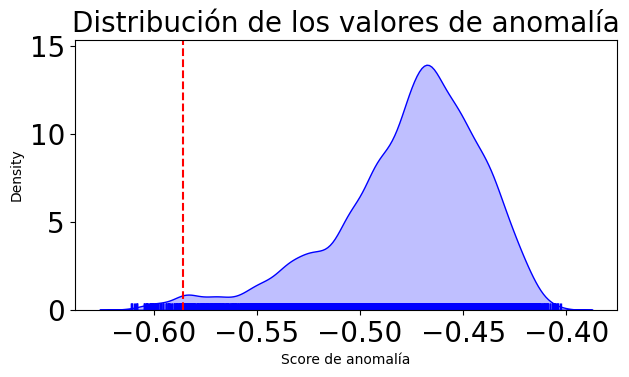

In [127]:
score_anomalia = iso_forest.score_samples(X=X_scaled)
score_anomalia
cuantil_01 = np.quantile(score_anomalia, q=0.01)
cuantil_01

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.distplot(
    score_anomalia,
    hist    = False,
    rug     = True,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)

ax.axvline(cuantil_01, c='red', linestyle='--', label='cuantil 0.01')
ax.set_title('Distribución de los valores de anomalía')
ax.set_xlabel('Score de anomalía');

In [128]:
#Eliminar los outliers

dataSetCompleto = dataSetCompleto[dataSetCompleto["outlier"]!= -1]
len(dataSetCompleto)



16018